In [3]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import math
import hashlib

## Read in Data and Split into months

In [37]:
df_math_sept = pd.read_excel('Data/StATActivity-Data&Analysis.xlsx', sheetname=1)
df_math_dec = pd.read_excel('Data/StATActivity-Data&Analysis.xlsx', sheetname=2)

## Anonymizing Data

In [34]:
df_math_sept['First Name'] = [hash(val)for val in df_math_sept['First Name']]
df_math_sept['Class'] = [hash(val) for val in df_math_sept['Class']]
df_math_sept['Class'].unique()

array([-1028273951365604154, -1633040034837318058,   784310327575974077])

In [36]:
df_math_dec['FirstName'] = [hash(val)for val in df_math_dec['FirstName']]
df_math_dec['Class'] = [hash(val) for val in df_math_dec['Class']]
df_math_dec['Class'].unique()

array([-5639959969792992056, -8550569062478399911,   784310327575974077])

In [49]:
df_math_sept['First Name'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in df_math_sept['First Name']]
df_math_dec['FirstName'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in df_math_dec['FirstName']]
df_math_sept['Class'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in df_math_sept['Class']]
df_math_dec['Class'] = [hashlib.md5(val.encode('utf-8')).hexdigest() for val in df_math_dec['Class']]
df_math_sept.head()

,Student ID,First Name,Class,Category,% Correct,Proficiency Level:
0,102090,1f7bf9ce6d583e92ead7003090c52263,8eadc5d3e1f1919c527b6d865e226a88,[Sep 10-11] Gr1 IA Math 10-11,49.1,Below
1,101906,0f24b4817e0eb462de94ddfbc47a332e,c8b287075ce4f11c834d2a0ada967ddc,[Sep 10-11] Gr1 IA Math 10-11,43.5,Below
2,101982,fad5df872a99d10a80fc2337d1ea275b,43a9616a147c80fbefdfe2dbc988896c,[Sep 10-11] Gr1 IA Math 10-11,68.2,Approaching
3,101947,f2b4ffb1fce6be175baac966150f9390,8eadc5d3e1f1919c527b6d865e226a88,[Sep 10-11] Gr1 IA Math 10-11,47.8,Below
4,101898,a08372b70196c21a9229cf04db6b7ceb,c8b287075ce4f11c834d2a0ada967ddc,[Sep 10-11] Gr1 IA Math 10-11,37.4,Below


In [50]:
df_math_dec.head()

,Student ID,FirstName,Class,Category,% Correct,Proficiency Level:
0,101932,88068e33c78eb72f1b371c7110846085,8eadc5d3e1f1919c527b6d865e226a88,[Dec 10-11] Gr1 IA Math 10-11,48.5,Below
1,101927,8af7fdc6cb5f743b599a3e03b4461e93,8eadc5d3e1f1919c527b6d865e226a88,[Dec 10-11] Gr1 IA Math 10-11,64.5,Below
2,101908,71f22cde790e93efe5d7cb77bbc8eae1,c8b287075ce4f11c834d2a0ada967ddc,[Dec 10-11] Gr1 IA Math 10-11,37.5,Below
3,103234,c98387889a60cef1feb72222ee635d27,8eadc5d3e1f1919c527b6d865e226a88,[Dec 10-11] Gr1 IA Math 10-11,50.6,Below
4,101955,07e556728e29ff6dc6bf0042aaead2c5,c8b287075ce4f11c834d2a0ada967ddc,[Dec 10-11] Gr1 IA Math 10-11,40.3,Below


In [52]:
# determine hashed Class Names
A,B,C = df_math_sept['Class'].unique()
D,E,F = df_math_dec['Class'].unique()

In [56]:
assert A == D
assert B == E
assert C == F

### Plot Scores from September and December in Histogram Form

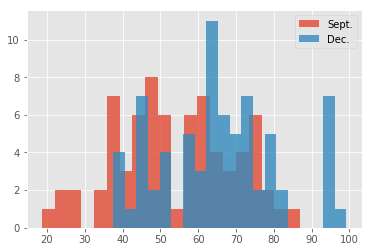

In [13]:
plt.figure()
df_math_sept['% Correct'].hist(bins=20, alpha=0.8, label='Sept.')
df_math_dec['% Correct'].hist(bins=20, alpha=0.8, label='Dec.')
plt.legend()

Noticable shift from Sept -> Dec

In [14]:
sept_attr = (df_math_sept['% Correct'].mean(), df_math_sept['% Correct'].median(),max(df_math_sept['% Correct'])-min(df_math_sept['% Correct']))
dec_attr = (df_math_dec['% Correct'].mean(), df_math_dec['% Correct'].median(),max(df_math_dec['% Correct'])-min(df_math_dec['% Correct']))

print('Change in\nMean: {}\nMedian: {}\nRange: {}'.format(*[round(x-y,2) for x, y in zip(dec_attr,sept_attr)]))

Change in
Mean: 11.81
Median: 12.15
Range: -6.6


## Use Student ID and Work with Entire Grade

In [15]:
sept_grades = df_math_sept[['Student ID','% Correct']].set_index('Student ID')
sept_grades.rename(columns={'% Correct': 'Sept % Correct'}, inplace=True)
dec_grades = df_math_dec[['Student ID', '% Correct']].set_index('Student ID')
dec_grades.rename(columns={'% Correct': 'Dec % Correct'}, inplace=True)
grades = sept_grades.join(dec_grades, how='left')
grades['% Change'] = grades['Dec % Correct'] - grades['Sept % Correct']
grades.sort_values('% Change', ascending=False, axis=0, inplace=True);
grades.head()

,Sept % Correct,Dec % Correct,% Change
Student ID,,,
101986,28.7,95.7,67.0
101898,37.4,95.7,58.3
103167,40.1,95.7,55.6
101938,45.5,95.7,50.2
101914,33.0,78.2,45.2


In [16]:
grades.mean()

Sept % Correct    53.919444
Dec % Correct     65.729167
% Change          11.809722
dtype: float64

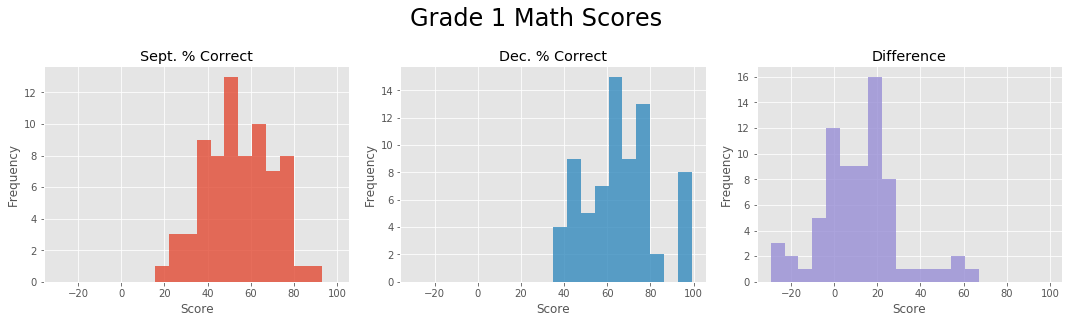

In [17]:
plt.figure()
ax=grades.plot(kind='hist', subplots=True, alpha=0.8, bins = 20, legend=False,\
            layout=(1,3),figsize=(15,4),title=['Sept. % Correct', 'Dec. % Correct', 'Difference'])
plt.suptitle('Grade 1 Math Scores',fontsize=24,y=1.11)
for i in range(len(ax[0])):
    ax[0][i].set_xlabel('Score')
plt.tight_layout()

### Split into classes

In [57]:
A_math = df_math_sept.set_index('Student ID').join(df_math_dec.set_index('Student ID'), how='left', rsuffix='_Dec')
C_math = A_math[['Class','First Name','% Correct','% Correct_Dec']][A_math['Class']== C]
B_math = A_math[A_math[['Class','First Name','% Correct','% Correct_Dec']]['Class']== B]
A_math = A_math[A_math[['Class','First Name','% Correct','% Correct_Dec']]['Class']== A]

C_math['Diff'] = C_math['% Correct_Dec'] - C_math['% Correct']
B_math['Diff'] = B_math['% Correct_Dec'] - B_math['% Correct']
A_math['Diff'] = A_math['% Correct_Dec'] - A_math['% Correct']

In [58]:
class_improvement = {'C':C_math.Diff.mean(),'B': B_math.Diff.mean(),\
                     'A':A_math.Diff.mean()}
for k,v in class_improvement.items():
    print('{} improved by {}%'.format(k,round(v,1)))

B improved by 10.2%
A improved by 16.8%
C improved by 8.5%


In [70]:
A_math.median()

% Correct        54.65
% Correct_Dec    69.40
Diff             16.95
dtype: float64

In [72]:
B_math.median()

% Correct        53.5
% Correct_Dec    63.4
Diff             12.1
dtype: float64

In [71]:
C_math.median()

% Correct        47.80
% Correct_Dec    63.20
Diff              9.25
dtype: float64

### Plot each class histogram

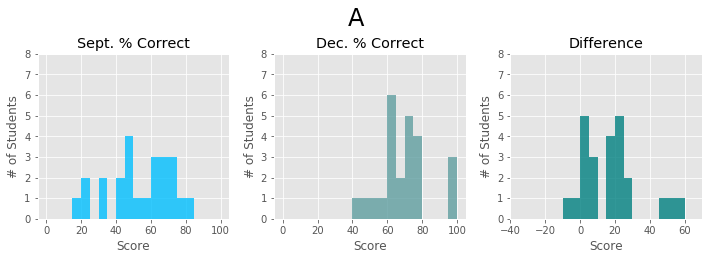

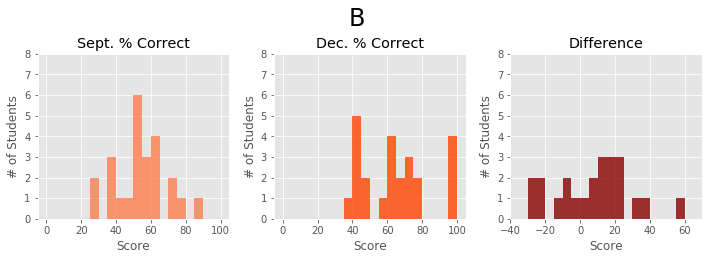

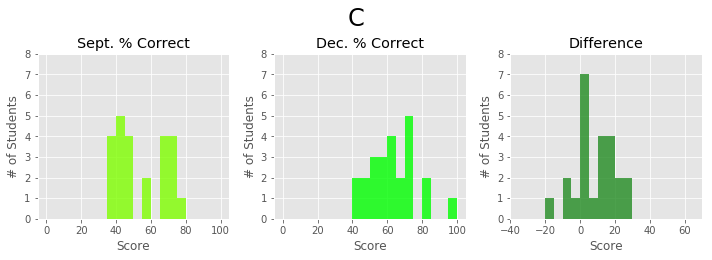

In [60]:
fig, ax = plt.subplots(1,3,figsize=(10,3.3),subplot_kw={'ylim': (0,8)})
fig.suptitle('A',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
A_math['% Correct'].hist(color='deepskyblue',alpha=0.8, bins = 20,\
                           label = 'A',range=[0, 100],  ax= ax[0])
A_math['% Correct_Dec'].hist(color='cadetblue',alpha=0.8, bins = 20,\
                           label = 'A',range=[0, 100], ax= ax[1])
A_math['Diff'].hist(color='teal',alpha=0.8, bins = 20,\
                           label = 'A',range=[-35, 65], ax= ax[2])
fig.tight_layout()


fig, ax = plt.subplots(1,3,figsize=(10,3.3),subplot_kw={'ylim': (0,8)})
fig.suptitle('B',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
    ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
B_math['% Correct'].hist(color='coral',alpha=0.8, bins = 20,\
                           label = 'B',range=[0, 100], ax= ax[0])
B_math['% Correct_Dec'].hist(color='orangered',alpha=0.8, bins = 20,\
                           label = 'B',range=[0, 100], ax= ax[1])
B_math['Diff'].hist(color='darkred',alpha=0.8, bins = 20,\
                           label = 'B',range=[-35, 65],  ax= ax[2])
fig.tight_layout()


fig, ax = plt.subplots(1,3,figsize=(10,3.3), subplot_kw={'ylim': (0,8)})
fig.suptitle('C',fontsize=24, y=1.08)
for axis in ax:
    axis.set(xlabel="Score", ylabel="# of Students")
ax[0].set_title('Sept. % Correct')
ax[1].set_title('Dec. % Correct')
ax[2].set_title('Difference')
C_math['% Correct'].hist(color='chartreuse',alpha=0.8, bins = 20,\
                           label='C',range=[0, 100], ax= ax[0])
C_math['% Correct_Dec'].hist(color='lime',alpha=0.8, bins = 20,\
                           label='C',range=[0, 100], ax= ax[1])
C_math['Diff'].hist(color='forestgreen',alpha=0.8, bins = 20,\
                           label='C',range=[-35, 65],  ax= ax[2])
fig.tight_layout()

### Further Graphical Analysis
Further grahical analysis can be found here: http://bit.ly/SABronx1GA
The analysis includes growth curves and be looked at on the grade level and by class.

## Analysis of Progress

In [62]:
print('{} students have shown improvement and {} have shown regression.'.format(\
            grades['% Change'][grades['% Change'] > 0].count(),grades['% Change'][grades['% Change'] < 0].count()))

58 students have shown improvement and 14 have shown regression.


In [63]:
most_prog = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'] == grades.index[0]]
least_prog = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'] == grades.index[-1]]

In [64]:
most_prog['Improvement'] = grades['% Change'].loc[most_prog['Student ID']].values
least_prog['Improvement'] = grades['% Change'].loc[least_prog['Student ID']].values

In [65]:
print('Most Progress:\n{} in {} Class: {}\nLeast Progress:\n{} in {}: {}'.\
      format(*[most_prog.values[0][i] for i in [0,1,-1]]+[least_prog.values[0][i] for i in [0,1,-1]]))

Most Progress:
c02bf7384c92a9eee646650ad8e5ff91 in c8b287075ce4f11c834d2a0ada967ddc Class: 67.0
Least Progress:
f54c99dd1f73b138f90e529dfbf8931f in c8b287075ce4f11c834d2a0ada967ddc: -29.400000000000006


In [66]:
top_five = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'].isin(grades.index[:5])].set_index('Student ID')
bottom_five = df_math_sept[['First Name', 'Class', 'Student ID']][df_math_sept['Student ID'].isin(grades.index[-5:])].set_index('Student ID')

In [67]:
top_five = top_five.join(grades['% Change']).sort_values('% Change', ascending=False, axis=0)
bottom_five = bottom_five.join(grades['% Change']).sort_values('% Change', ascending=False, axis=0)

In [68]:
top_five

,First Name,Class,% Change
Student ID,,,
101986,c02bf7384c92a9eee646650ad8e5ff91,c8b287075ce4f11c834d2a0ada967ddc,67.0
101898,a08372b70196c21a9229cf04db6b7ceb,c8b287075ce4f11c834d2a0ada967ddc,58.3
103167,a18d88133106f4247313ac432b653551,8eadc5d3e1f1919c527b6d865e226a88,55.6
101938,911e57e429ebcfe6a70c28e431e96b3e,8eadc5d3e1f1919c527b6d865e226a88,50.2
101914,4ffe35db90d94c6041fb8ddf7b44df29,8eadc5d3e1f1919c527b6d865e226a88,45.2


In [69]:
bottom_five

,First Name,Class,% Change
Student ID,,,
101960,f0f709cb5d63b6f0bad5c5c586fb2447,43a9616a147c80fbefdfe2dbc988896c,-19.2
101974,96ea75ddbcf0a701a81c3d554cdb8976,c8b287075ce4f11c834d2a0ada967ddc,-20.4
101908,71f22cde790e93efe5d7cb77bbc8eae1,c8b287075ce4f11c834d2a0ada967ddc,-23.4
101963,7c26fca7962ad6112cd35fe9f632830e,c8b287075ce4f11c834d2a0ada967ddc,-29.0
101905,f54c99dd1f73b138f90e529dfbf8931f,c8b287075ce4f11c834d2a0ada967ddc,-29.4
